# Importing the necessary liabrary

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [49]:
df.shape

(8124, 23)

The are 8124 columns and 23 rows

In [50]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [51]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values

In [52]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

These are the columns that we have in our data frame

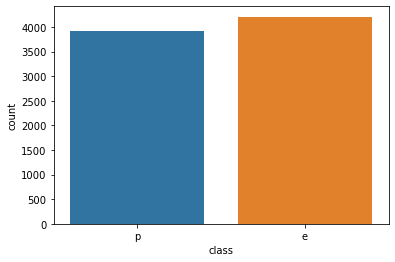

In [53]:
sns.countplot(df["class"])
warnings.filterwarnings("ignore")

We have edible mushroom more than compared to poisnous

<Figure size 1008x432 with 0 Axes>

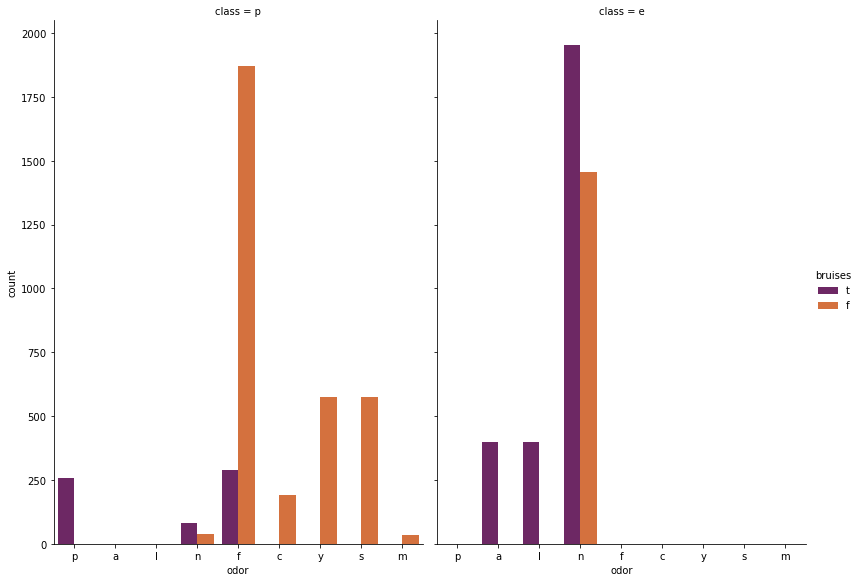

In [54]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = "odor", hue = "bruises",  col = "class",
               data = df, kind = "count",
               height = 8, aspect = .7, palette = "inferno");

The mushroom with fishy odor are poisnous and the one with tangy us edible

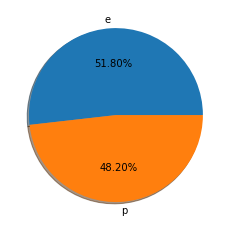

In [55]:
labels = "e","p"
fig, ax = plt.subplots()
ax.pie(df["class"].value_counts(),labels=labels, autopct = "%1.2f%%" , shadow = True)

warnings.filterwarnings("ignore")

Have tried to understand the distribution between edible and poisnous

<AxesSubplot:xlabel='class', ylabel='Count'>

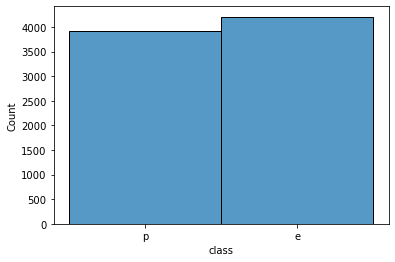

In [56]:
sns.histplot(df["class"])

Have tried to understand the distribution between edible and poisnous using histplot

# Preprocessing

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [58]:
x = df.drop(["class"], axis =1)
y = df["class"]

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 0)

# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 0, max_depth= 5)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [62]:
dt.score(x_train, y_train)

0.9776364382437424

In [63]:
predictions = dt.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9818461538461538

The accuracy score is 98.18%

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [66]:
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.9913828477636438

In [67]:
predictions = rf.predict(x_test)
rf.score(x_test, y_test)

0.9916923076923077

In [68]:
accuracy_score(y_test, predictions)


0.9916923076923077

The accuracy score is 99.16%